Having javascript problems with the old Image Characteristics notebook. Copying out the important parts and making some graphs that'll look nice that can be saved to SVG.

In [1]:
cd ..

/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work


In [2]:
import neukrill_net.utils

In [3]:
settings = neukrill_net.utils.Settings('settings.json')

In [4]:
imagedict = settings.image_fnames['train']

In [5]:
classes = list(imagedict.keys())
# copy the list
temp_classes = classes[:]
while len(temp_classes) > 0:
    # take three off the temp list on each iteration and print them
    # with tabs in between, catching the last few with the if
    if len(temp_classes) < 3:
        print("\t".join([temp_classes.pop() for i in range(len(temp_classes))]))
    else:
        print("\t".join([temp_classes.pop() for i in range(3)]))

protist_noctiluca	polychaete	tunicate_doliolid
hydromedusae_shapeA_sideview_small	fish_larvae_myctophids	copepod_calanoid_large
hydromedusae_other	protist_dark_center	acantharia_protist_big_center
hydromedusae_solmaris	fish_larvae_thin_body	tunicate_partial
jellies_tentacles	hydromedusae_shapeA	hydromedusae_shapeB
diatom_chain_tube	shrimp_caridean	copepod_cyclopoid_copilia
siphonophore_other_parts	diatom_chain_string	echinoderm_larva_pluteus_brittlestar
ctenophore_cydippid_no_tentacles	euphausiids_young	tunicate_doliolid_nurse
chaetognath_other	fish_larvae_medium_body	hydromedusae_bell_and_tentacles
fecal_pellet	tunicate_salp	ephyra
hydromedusae_narcomedusae	shrimp_sergestidae	copepod_cyclopoid_oithona_eggs
protist_fuzzy_olive	siphonophore_calycophoran_rocketship_young	invertebrate_larvae_other_B
decapods	unknown_blobs_and_smudges	radiolarian_chain
euphausiids	hydromedusae_typeD_bell_and_tentacles	echinoderm_larva_pluteus_urchin
detritus_other	invertebrate_larvae_other_A	copepod_calano

In [6]:
import skimage.io
import numpy as np

In [7]:
image_array_dict = {}
for i,c in enumerate(classes):
    #print("class: {0} of 120: {1}".format(i,c))
    image_fpaths = imagedict[c]
    # dictionary will contain lists of numpy arrays
    image_array_dict[c] = []
    # iterate over all paths adding to list in dictionary
    for fpath in image_fpaths:
        image_array_dict[c].append(skimage.io.imread(fpath))

In [8]:
dimensions = [image_array.shape for imagelist in list(image_array_dict.values()) for image_array in imagelist]

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.grid'] = True
plt.set_cmap('brg')

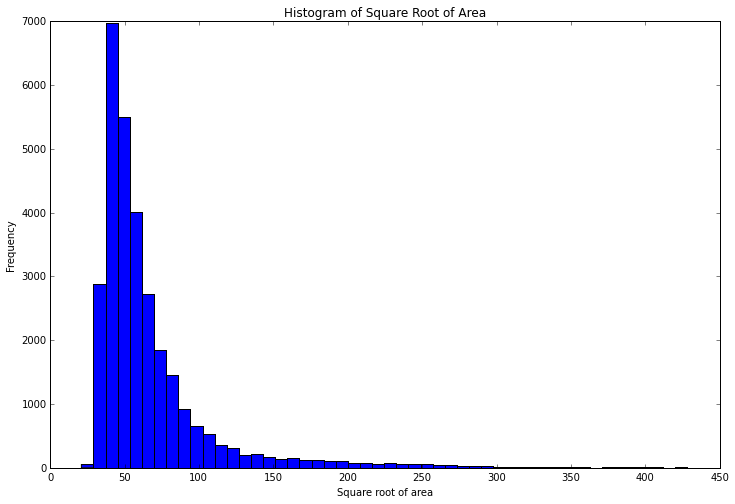

In [11]:
x,y = zip(*dimensions)
plt.title("Histogram of Square Root of Area")
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("Square root of area")
h = plt.hist(x, bins=50)
plt.savefig("plots/hist_sqrt_area.svg")
plt.savefig("plots/hist_sqrt_area.png")

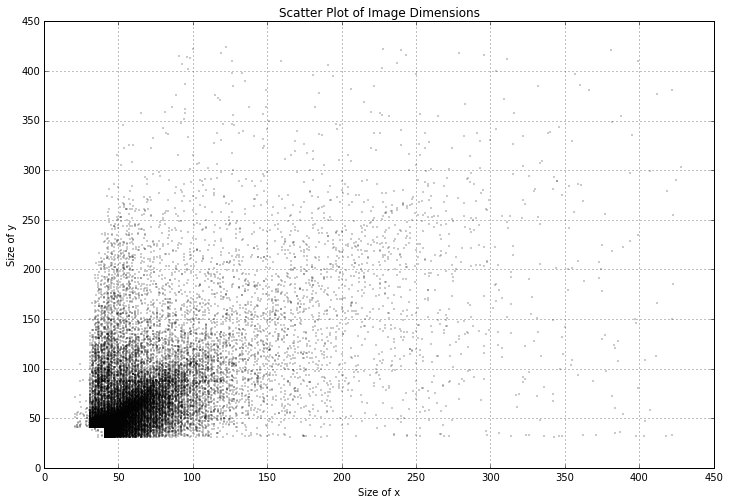

In [12]:
plt.clf()
plt.scatter(x,y,s=0.1,c='black',alpha=0.8)
plt.xlabel("Size of x")
plt.ylabel("Size of y")
plt.title("Scatter Plot of Image Dimensions")
plt.savefig("plots/scatter_dimensions.svg")
plt.savefig("plots/scatter_dimensions.png")

In [13]:
# build a list of dimensions
dimensions = [neukrill_net.image_processing.landscapise_image(image_array).shape
                  for imagelist in list(image_array_dict.values())
                  for image_array in imagelist]

In [14]:
x,y = zip(*dimensions)

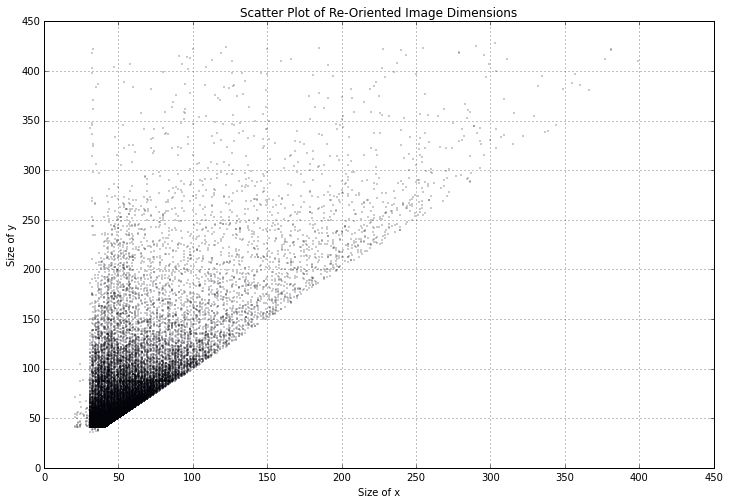

In [16]:
plt.clf()
plt.scatter(x,y,s=0.1,alpha=0.8)
plt.xlabel("Size of x")
plt.ylabel("Size of y")
plt.title("Scatter Plot of Re-Oriented Image Dimensions")
plt.savefig("plots/landscape_scatter_dimensions.svg")
plt.savefig("plots/landscape_scatter_dimensions.png")

In [17]:
# dictionary of classes as keys and number of examples for values
n_examples = {}
for c in classes:
    n_examples[c] = len(imagedict[c])

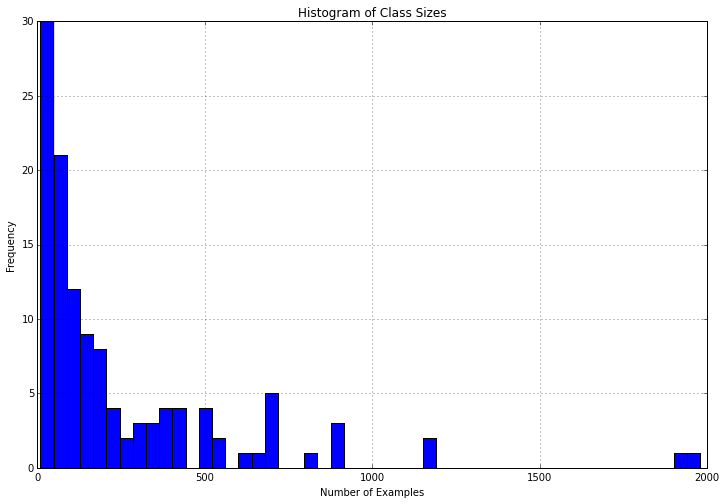

In [18]:
plt.title("Histogram of Class Sizes")
plt.ylabel("Frequency")
plt.xlabel("Number of Examples")
h=plt.hist(list(n_examples.values()),bins=50)
plt.savefig("plots/class_hist.svg")
plt.savefig("plots/class_hist.png")

In [ ]:
ks = [k for k in classes if n_examples[k] < 50]
lessthan50 = [n_examples[k] for k in ks]
ks,lessthan50 = zip(*sorted(zip(ks,lessthan50),key=lambda x: x[1],reverse=True))
fig, ax = plt.subplots()
ind = range(len(lessthan50))
ax.bar(ind,lessthan50)
ax.set_xticks(np.array(ind)+0.5)
ax.set_xticklabels(ks,rotation=90)
ax.set_title("Classes with less than 50 examples.")
plt.ylabel("Number of examples")
plt.savefig("plots/classes_below50.svg")
plt.savefig("plots/classes_below50.png")
plt.show()